In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Understanidng Dataset

In [63]:
dataset = pd.read_csv(r'C:\Users\Ansh\Desktop\foml\linear regression mulitvariable\1000_Companies (1).csv')
dataset.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
422,113132.00,127164.9447,287067.54210,California,145680.59050
687,38385.00,116125.9672,142843.00150,California,81824.87341
643,4187.00,111075.4508,76857.86711,New York,52609.81711
18,91749.16,114175.7900,294919.57000,Florida,124266.90000
454,36880.00,115903.7020,139939.09990,Florida,80539.16490


In [64]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [65]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


## Extracting Features

In [66]:
independent_vars = dataset.iloc[:,:-1].values
print(independent_vars)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]


In [67]:
dependent_var = dataset['Profit'].values
print(dependent_var)

[192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.1696   89803.10053
  75297.23305 114284.5283  171985.0761   72337.96774 169566.5772
 158670.9451  114522.8756   85842.60573 101106.2297   59328.81874
 157142.6178   68669.64059 177717.3712   94409.4396  183945.1553
  82484.38635 144515.3371  105333.2634  122331.0988  168459.4156
  60947.70089 162733.9549  181574.4968   7357

## Encoding Categorical data (state)

In [68]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
independent_vars[:,3] = labelencoder.fit_transform(independent_vars[:,3])

# onehotencoder = OneHotEncoder(categorical_features = [3])
onehotencoder = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = onehotencoder.fit_transform(independent_vars)
X = X.astype('float64')
print(X[0])

[0.000000e+00 0.000000e+00 1.000000e+00 1.653492e+05 1.368978e+05
 4.717841e+05]


## Avoiding Dummy variable issue

In [23]:
independent_vars = independent_vars[:,1]

## Dividing Data into training and testing split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independent_vars,dependent_var,test_size=0.2,random_state=0)

In [71]:
X_train

array([[38385.0, 116125.9672, 142843.0015, 0],
       [125610.0, 129007.7526, 311143.8772, 1],
       [101322.0, 125420.7901, 264280.1149, 0],
       ...,
       [22876.0, 113835.5275, 112918.3436, 0],
       [66766.0, 120317.4026, 197604.2185, 0],
       [112108.0, 127013.7157, 285091.7313, 0]], dtype=object)

In [72]:
X_test

array([[46798.0, 117368.4374, 159075.908, 0],
       [45209.0, 117133.7666, 156009.9281, 0],
       [52746.0, 118246.8651, 170552.5902, 0],
       [147916.0, 132302.0043, 354183.3651, 1],
       [40178.0, 116390.7656, 146302.5999, 2],
       [71829.0, 121065.1295, 207373.2908, 2],
       [72107.6, 127864.55, 353183.81, 2],
       [48759.0, 117658.0468, 162859.6628, 0],
       [134787.0, 130363.0537, 328850.9238, 2],
       [5210.0, 111226.5321, 78831.74841, 1],
       [20181.0, 113437.5176, 107718.3338, 0],
       [118649.0, 127979.7204, 297712.6087, 1],
       [90061.0, 123757.7143, 242551.9846, 0],
       [11310.0, 112127.4079, 90601.71506, 0],
       [149026.0, 132465.9341, 356325.1131, 0],
       [30744.0, 114997.5096, 128099.6711, 2],
       [80987.0, 122417.6247, 225043.6768, 1],
       [133947.0, 130238.9987, 327230.1415, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [155148.0, 133370.059, 368137.5289, 2],
       [61136.38, 152701.92, 88218.23, 2],
       [41996.0, 116

In [73]:
y_train

array([ 81824.87341, 156340.4382 , 135591.4094 ,  60065.21791,
       142927.2094 , 175826.8244 ,  87219.72342, 135641.8126 ,
       169403.4076 ,  94974.98049, 136286.8026 , 126058.372  ,
        89949.14   ,  71235.93187, 166415.9507 , 138841.9881 ,
       126993.8211 , 137670.7546 ,  78239.91   , 129889.8688 ,
       169745.1241 , 108896.5127 , 123671.4819 , 117289.0711 ,
        59981.49735, 126295.865  , 178552.8682 ,  54119.34996,
       124266.9    , 172937.611  ,  69995.5008 , 151992.0952 ,
       134268.9664 ,  59766.21593,  85842.60573,  84782.43014,
        98397.27172,  76229.26494, 127455.1384 , 110228.3529 ,
        59342.48741, 101119.044  , 146874.0356 , 158160.0789 ,
       161035.6236 , 184979.7022 ,  55832.20416, 191050.39   ,
        67282.27141, 163155.1205 ,  64349.48913,  59264.74689,
       140237.9002 ,  62223.15791,  60947.70089, 128977.4856 ,
       167373.6113 , 120790.8114 ,  65743.69265,  81229.06   ,
       146690.3629 , 177513.1956 , 174996.4532 , 138079

In [74]:
y_test

array([ 89012.02672,  87654.55773,  94093.35179, 175396.2616 ,
        83356.61784, 110395.794  , 105008.31   ,  90687.2921 ,
       164180.2702 ,  53483.75718,  66273.3533 , 150393.716  ,
       125971.2343 ,  58694.93455, 176344.525  ,  75297.23305,
       118219.3944 , 163462.6654 , 132602.65   , 181574.4968 ,
        97483.56   ,  84909.71956, 180684.3252 ,  83391.64379,
       104159.467  , 100404.0021 ,  64926.08   ,  56944.49153,
        68210.88613, 191792.06   , 120738.6997 , 110848.5685 ,
       101352.2656 , 137842.4672 ,  63306.39937, 107994.381  ,
       185502.5285 , 171176.9165 , 174364.2776 , 117645.3106 ,
        96616.9285 , 164336.6055 , 106865.8621 ,  50468.96294,
       116492.8715 ,  57992.70704, 158208.7735 ,  78689.62408,
       159514.1307 , 131051.7051 , 184555.1194 , 174329.2516 ,
        92949.45565,  78308.61013, 180257.1795 ,  84583.38025,
       142762.3312 , 170174.8327 ,  84305.73556, 105154.7165 ,
       141527.0259 ,  52609.81711, 140832.487  , 138872

## Fitting this data into model 

In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the results using test data

In [77]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89624.88499984,  88261.44060358,  94728.57723845, 176034.49990954,
        83234.84214495, 110393.04058199, 131831.18880607,  91307.52461765,
       164414.26754671,  53585.35570743,  66786.11950078, 150921.89704628,
       126746.78121459,  59174.341725  , 177341.80724482,  75139.98127599,
       118605.9491146 , 164403.24374731, 171336.34862472, 181885.06087421,
       118762.26624784,  85504.5201526 , 181345.84072646,  83979.76201107,
       104839.00200137, 101067.00608604,  53722.31401539,  56706.45386115,
        68732.18107141, 209811.34272095, 121136.34391499, 111557.54775873,
       101309.70393418, 138315.39958078,  63806.10546728, 108690.79660343,
       185830.38310114, 171796.58186122, 174997.97325294, 118029.33822338,
        96553.52264734, 165281.03076793, 107557.31012676,  50557.29080259,
       116871.82636073,  58469.02312669, 158771.35516035,  78902.17488961,
       160082.45834529, 131494.74562654, 185233.67354482, 174962.79318566,
        93579.64586335,  

## Calculating parameters of the model

In [78]:
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [79]:
print(regressor.intercept_)

-51144.726425721776


In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)  # r_2 > 90 -> good model

0.9112595959622045

## Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


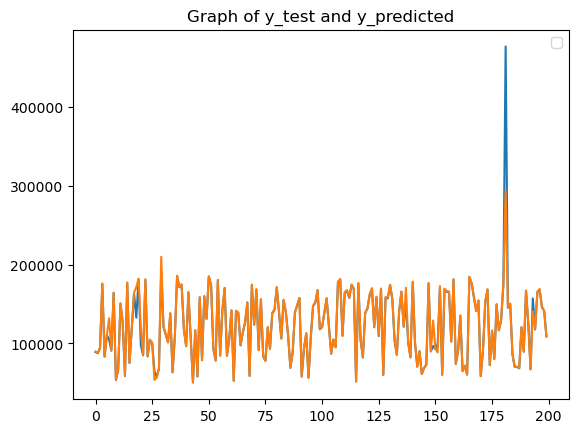

In [95]:
plt.title('Graph of y_test and y_predicted')
plt.legend()
plt.plot(y_test)
plt.plot(y_pred)